In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, theme, element_text, scale_fill_manual, labs, ggsave
import matplotlib.colors as mcolors


In [ ]:
df = pd.read_csv('count_by_color.csv')
df.head()

,pixel_color,total_pixels
0,#000000,28408060.0
1,#00756F,275618.0
2,#009EAA,145749.0
3,#00A368,4875511.0
4,#00CC78,444408.0


/usr/local/lib/python3.10/dist-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


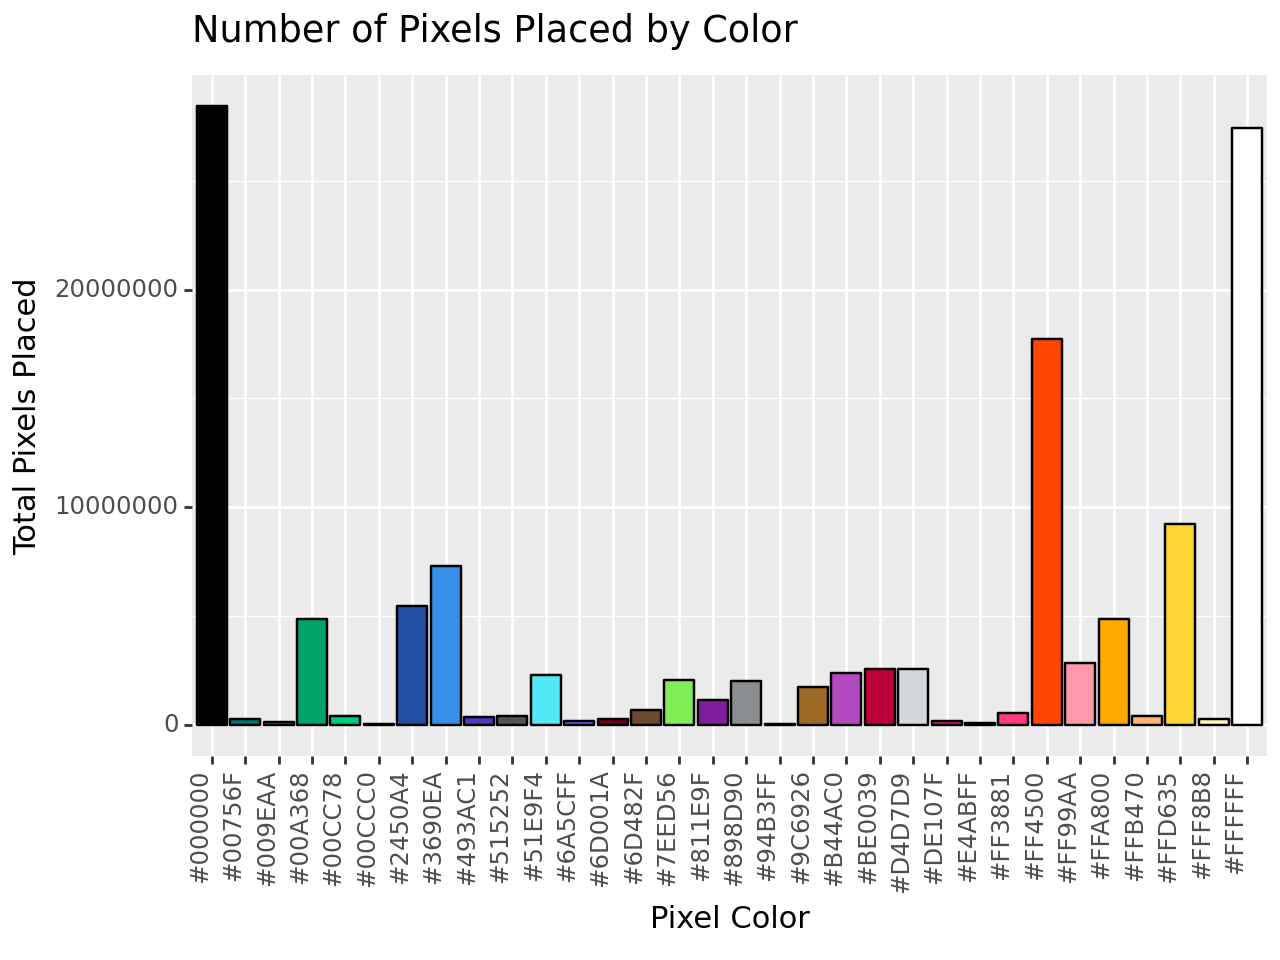

<Figure Size: (640 x 480)>

In [ ]:
plot = (
    ggplot(df, aes(x='pixel_color', y='total_pixels')) +
    geom_bar(stat='identity', color='black', fill=df['pixel_color']) +
    scale_fill_manual(values=df['pixel_color'].to_dict()) +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +
    labs(x = 'Pixel Color', y='Total Pixels Placed',title = 'Number of Pixels Placed by Color')
)

# Display the plot
plot

In [ ]:
filename = 'ColorCounts.png'  # Specify your desired file name
ggsave(plot, filename, height=5, width=7, dpi=300)

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 7 x 5 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ColorCounts.png
/usr/local/lib/python3.10/dist-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


In [ ]:
df = pd.read_csv('changes_cord.csv')
df.head()

,coordinate,number_of_changes
0,"-1,-1",412.0
1,"-1,-10",25.0
2,"-1,-100",19.0
3,"-1,-1000",31.0
4,"-1,-101",53.0


In [ ]:
dfs=df.sort_values(by='number_of_changes', ascending=False)
dfnew = dfs.reset_index(drop=True)
dfnew.head()

,coordinate,number_of_changes
0,"0,0",62365.0
1,"-1500,-1000",44336.0
2,"20,-401",28322.0
3,"999,499",21945.0
4,"-251,-415",21869.0


In [ ]:
top100 = dfnew.head(100)

In [ ]:
top100

,coordinate,number_of_changes
0,"0,0",62365.0
1,"-1500,-1000",44336.0
2,"20,-401",28322.0
3,"999,499",21945.0
4,"-251,-415",21869.0
...,...,...
95,"911,524",6519.0
96,"555,-222",6470.0
97,"112,191",6435.0
98,"291,-413",6389.0


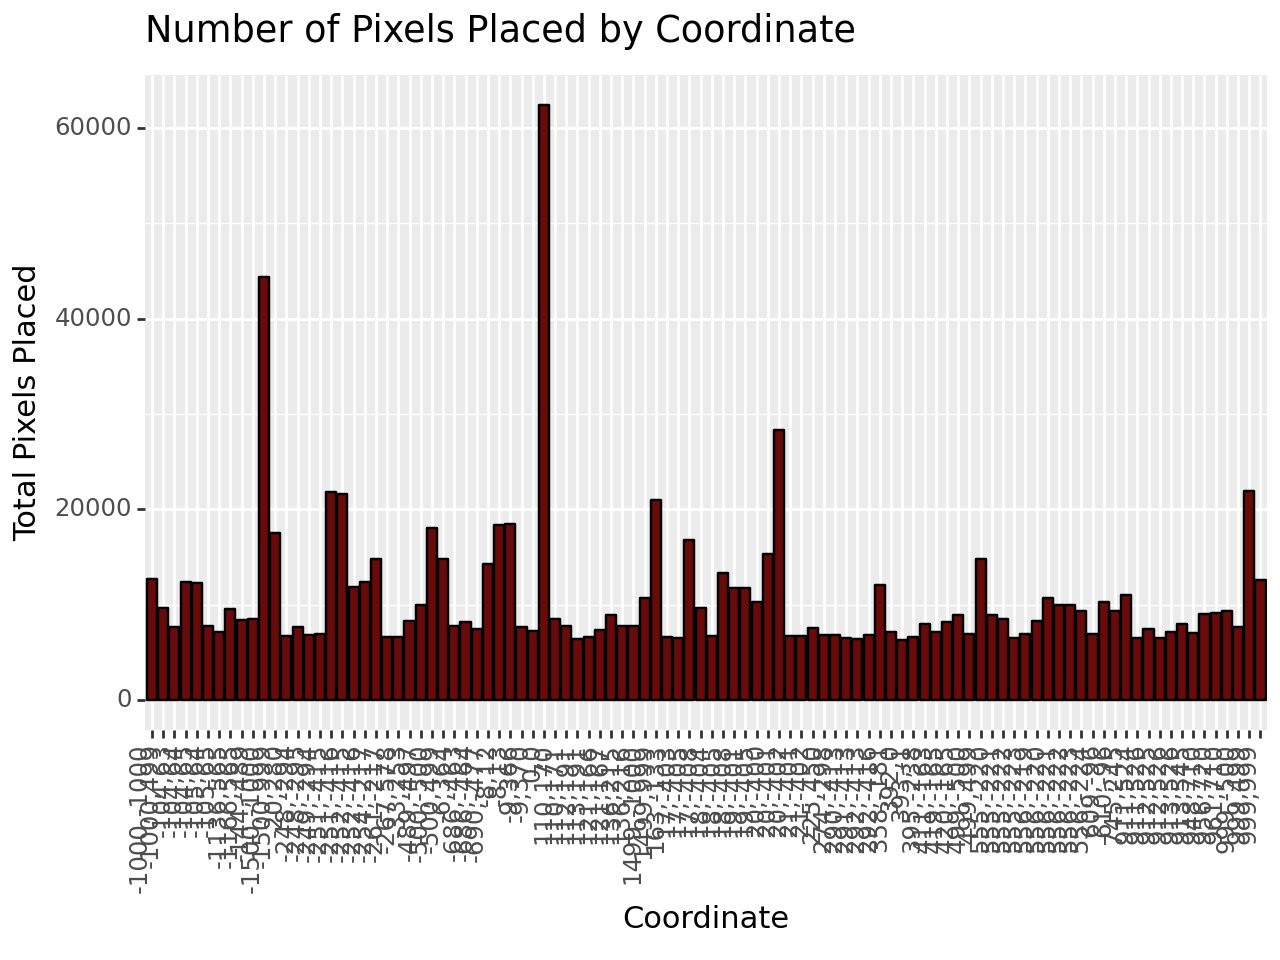

<Figure Size: (640 x 480)>

In [ ]:
plot = (
    ggplot(top100, aes(x='coordinate', y='number_of_changes')) +
    geom_bar(stat='identity', color='black', fill='#690b0b') +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +
    labs(x = 'Coordinate', y='Total Pixels Placed',title = 'Number of Pixels Placed by Coordinate')
)

# Display the plot
plot

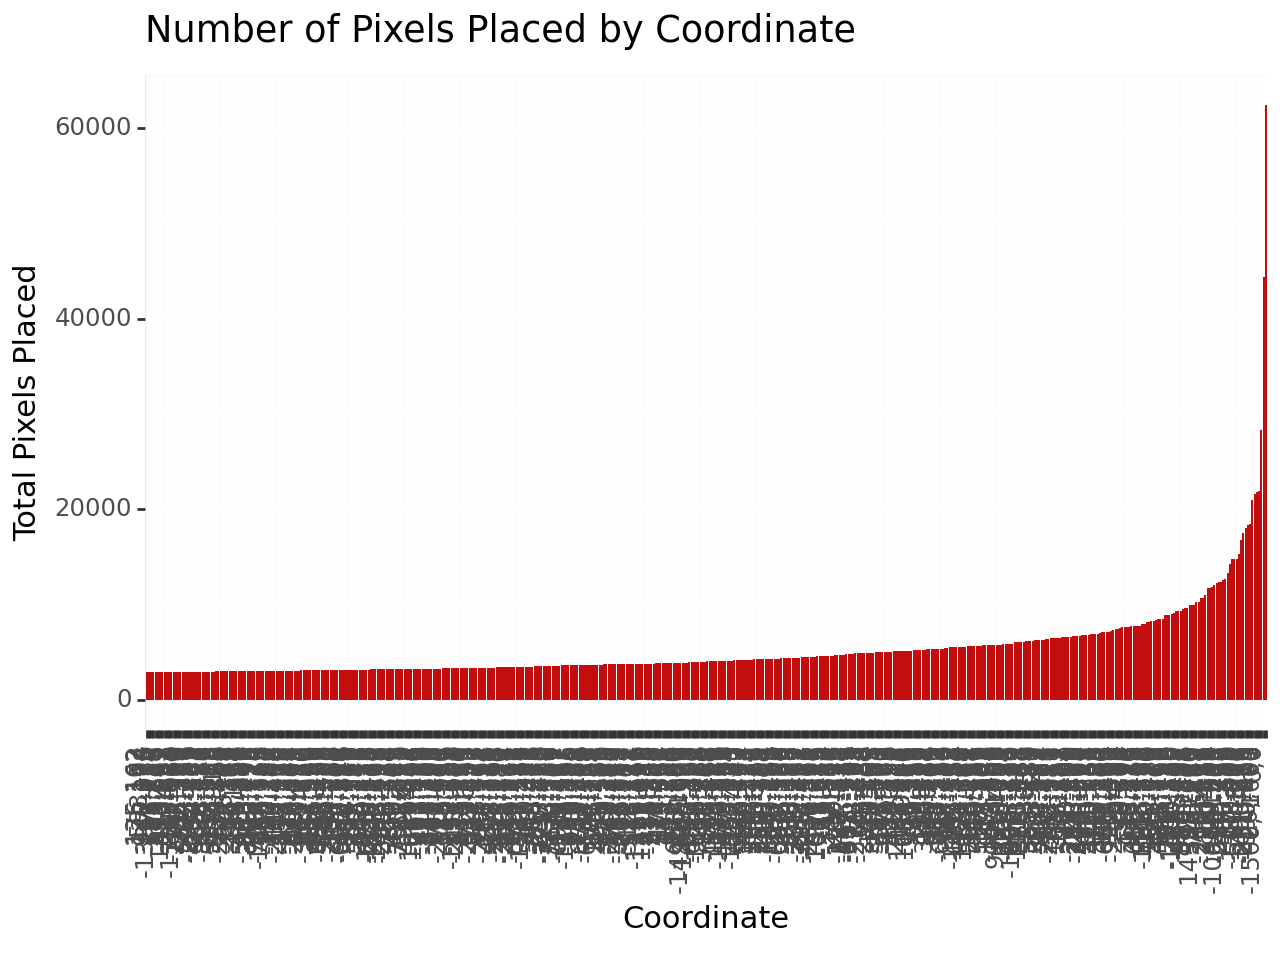

<Figure Size: (640 x 480)>

In [ ]:
top100 = dfnew.head(500)

plot = (
    ggplot(top100, aes(x='reorder(coordinate, number_of_changes)', y='number_of_changes')) +
    geom_bar(stat='identity', fill='#c20e0e') +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +
    labs(x='Coordinate', y='Total Pixels Placed', title='Number of Pixels Placed by Coordinate')
)

# Display the plot
plot

In [ ]:
from plotnine import ggplot, aes, geom_bar, theme, element_blank, labs


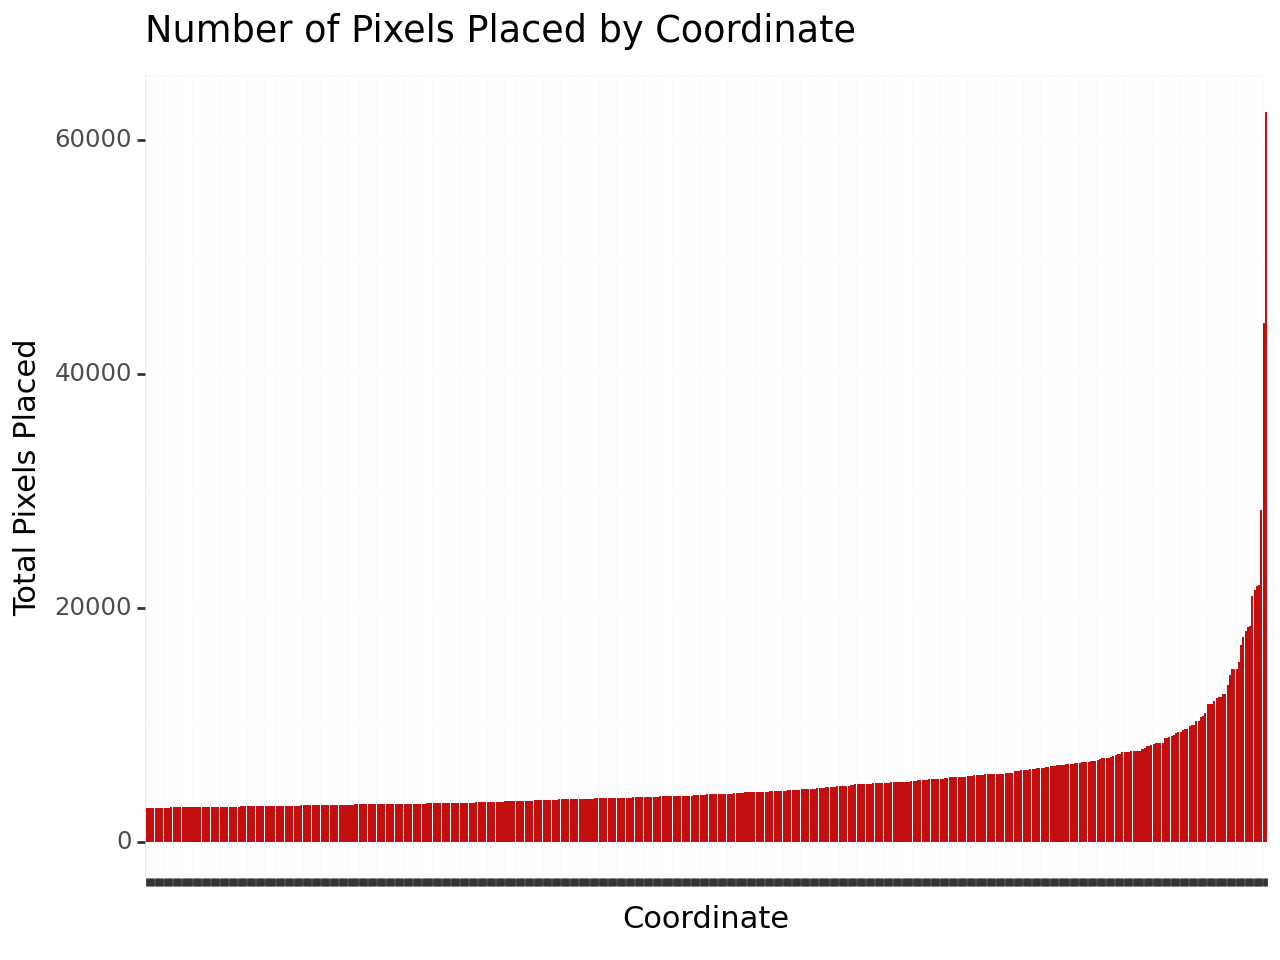

<Figure Size: (640 x 480)>

In [ ]:
plot = (
    ggplot(top100, aes(x='reorder(coordinate, number_of_changes)', y='number_of_changes')) +
    geom_bar(stat='identity', fill='#c20e0e') +
    theme(axis_text_x=element_blank()) +
    labs(x='Coordinate', y='Total Pixels Placed', title='Number of Pixels Placed by Coordinate')
)

plot

In [ ]:
top = dfnew.head(1000000)


In [ ]:
import re

def extract_coordinates(coord):

    if '{' in coord:

        # Extracting using regex for the format {X: value, Y: value, R: value}

        match = re.search(r'X: (-?\d+), Y: (-?\d+)', coord)

        if match:

            return int(match.group(1)), int(match.group(2))

        else:

            return None, None

    else:

        try:

            x, y = coord.split(',')

            return int(x), int(y)

        except ValueError:

            return None, None


top[['X', 'Y']] = top['coordinate'].apply(lambda x: extract_coordinates(x)).tolist()





import numpy as np

import matplotlib.pyplot as plt




In [ ]:
top

,coordinate,number_of_changes,X,Y
0,"0,0",62365.0,0,0
1,"-1500,-1000",44336.0,-1500,-1000
2,"20,-401",28322.0,20,-401
3,"999,499",21945.0,999,499
4,"-251,-415",21869.0,-251,-415
...,...,...,...,...
4995,"775,41",875.0,775,41
4996,"-138,212",875.0,-138,212
4997,"-67,225",875.0,-67,225
4998,"-258,392",874.0,-258,392


In [ ]:
top['Y'] = -top['Y']

In [ ]:
canvas_size = [-1000, 1000, -1500, 1500]



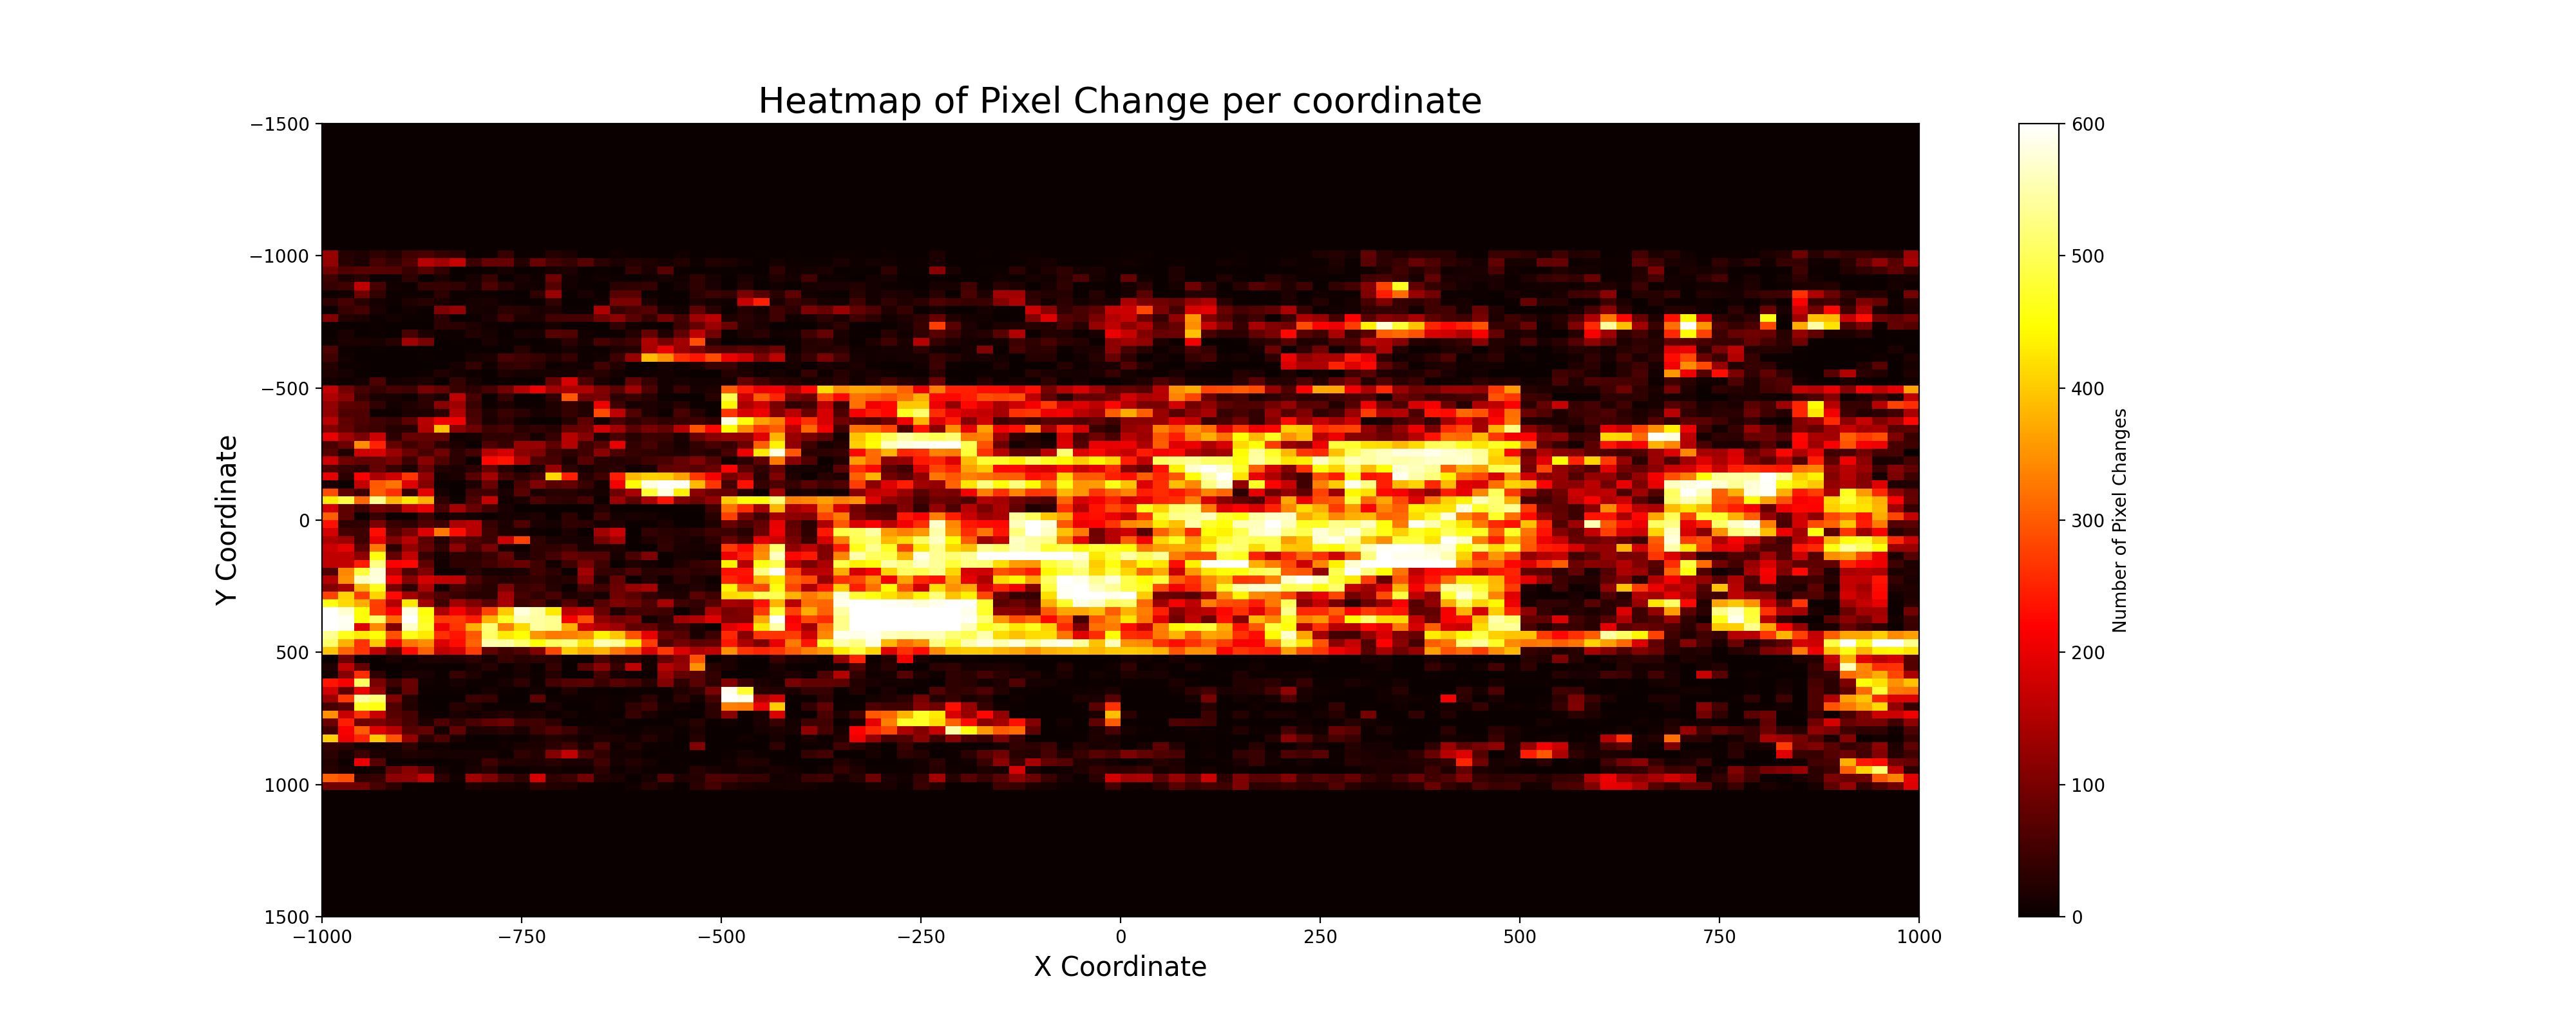

In [ ]:
## the bigger the bins the less it will group the cordinates together in a square

heatmap, xedges, yedges = np.histogram2d(top['X'], top['Y'], bins=(100, 100), range=[[canvas_size[0], canvas_size[1]], [canvas_size[2], canvas_size[3]]])


plt.figure(figsize=(20, 8))

plt.imshow(heatmap.T, origin='lower', cmap='hot', interpolation='nearest', aspect='auto', extent=[canvas_size[0], canvas_size[1], canvas_size[2], canvas_size[3]])

plt.colorbar(label='Number of Pixel Changes')

plt.title('Heatmap of Pixel Change per coordinate', fontsize=20)

plt.xlabel('X Coordinate', fontsize=15)

plt.ylabel('Y Coordinate', fontsize=15)

plt.ylim(1500,-1500)

plt.savefig('map.png', bbox_inches='tight')


plt.show()

In [ ]:
plt.savefig('map.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [ ]:
plt.savefig('heatmap.png')

from google.colab import files

# Download the file (optional, in Google Colab)
files.download('heatmap.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
df = pd.read_csv('user_df_final.csv')
df.head()

,user,colors,unique_color_count,coordinates,unique_cord,tot_pixels,avg_time_diff,time_var
0,++++K56vVwFvtMk4rJYyUfMpRYAIqMKxu6u8ebfFkWPnEG...,#3690EA#FFA800#000000#000000#898D90#FFFFFF#51E...,6.0,"445,-495179,460194,367785,-43,793,-97815,-90,-...",8.0,8.0,NaN,NaN
1,+++2YMNQROwh54UiQEYv6iz5yQdEr8uXrZ2EcTkipRbtJ+...,#FF4500,1.0,"731,-368",1.0,1.0,NaN,NaN
2,+++2ny7CcancFxNL6HI+hcDiqXGepL+zGk9n9wfz8tNjCA...,#000000#FFD635#FF4500#000000#000000#FF4500#000...,5.0,"915,470,919,674986,652911,524922,483971,655910...",21.0,21.0,116.869444,767.947269
3,+++5DPynrKmnxpZ5nTRQ3tH/bHtaN90XCoL0R8e5a3mLuo...,#000000#FF4500,2.0,"347,118301,161",3.0,3.0,74.616667,NaN
4,+++8f06xnBjeWJ3728FQUjrV5mg3eJRHZra2yYWSySguD7...,#FFFFFF#FFFFFF#FFFFFF#FFD635#BE0039#000000#FFF...,4.0,"-260,192699,88513,84,-276,195,207,812,-245,-66...",39.0,39.0,17.761429,32.690713


In [ ]:
df = pd.read_csv('user_df.csv')
df.head()

,colors,unique_color_count,coordinates,unique_cord,tot_pixels,avg_time_diff,time_var,id
0,#3690EA#FFA800#000000#000000#898D90#FFFFFF#51E...,6,"445,-495179,460194,367785,-43,793,-97815,-90,-...",8.0,8.0,NaN,NaN,1
1,#FF4500,1,"731,-368",1.0,1.0,NaN,NaN,2
2,#000000#FFD635#FF4500#000000#000000#FF4500#000...,5,"915,470,919,674986,652911,524922,483971,655910...",21.0,21.0,116.869444,767.947269,3
3,#000000#FF4500,2,"347,118301,161",3.0,3.0,74.616667,NaN,4
4,#FFFFFF#FFFFFF#FFFFFF#FFD635#BE0039#000000#FFF...,4,"-260,192699,88513,84,-276,195,207,812,-245,-66...",39.0,39.0,17.761429,32.690713,5


In [ ]:
len(df)
#number of total users

NameError: name 'df' is not defined

In [ ]:
max(df['unique_cord'])

4571.0

In [ ]:
max_pixel_index = df['tot_pixels'].idxmax()

# Print the row with the maximum pixel_count
max_pixel_row = df.loc[max_pixel_index]
print(max_pixel_row)

colors                #FFFFFF#FF4500#FFD635#FFFFFF#FFA800#2450A4#FFD...
unique_color_count                                                    6
coordinates           -314,113281,-367281,-332,659,34466,405,83,-709...
unique_cord                                                      4571.0
tot_pixels                                                       7504.0
avg_time_diff                                                  1.020435
time_var                                                      18.373037
id                                                              6442900
Name: 6442899, dtype: object


In [ ]:
max(df['tot_pixels'])

7504.0

In [ ]:
import numpy as np

In [ ]:
np.mean(df['tot_pixels'])

15.204734682668407

In [ ]:
np.mean(df['unique_cord'])

14.765162415470957

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['id'] = df['id'].astype(str)

In [ ]:
top_users = df.sort_values(by='tot_pixels', ascending=False).head(20)

In [ ]:
top_users['id'] = top_users['id'].astype(str)

In [ ]:
top_users.dtypes

colors                 object
unique_color_count      int64
coordinates            object
unique_cord           float64
tot_pixels            float64
avg_time_diff         float64
time_var              float64
id                     object
dtype: object

In [ ]:
same = ['6442900','206835','5255789','4307728','5189697','5884216','6953889','209112','6943600','13558','4559944','7744284','4699976']

<ipython-input-38-0c6b34e31ecf>:18: UserWarning: FixedFormatter should only be used together with FixedLocator


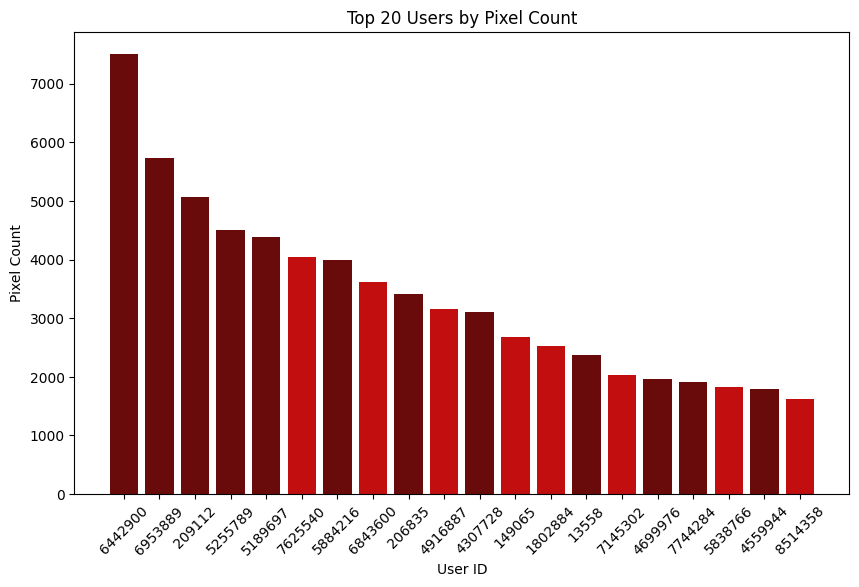

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))

# Loop through the top_users and set the color based on whether they are in 'same'
for user_id, tot_pixels in zip(top_users['id'], top_users['tot_pixels']):
    if user_id in same:
        plt.bar(user_id, tot_pixels, color='#690b0b')
    else:
        plt.bar(user_id, tot_pixels, color='#c20e0e')

# Add labels and title
plt.xlabel('User ID')
plt.ylabel('Pixel Count')
plt.title('Top 20 Users by Pixel Count')

# Set x-ticks to only include the IDs of the top users
plt.xticks(rotation=45)  # Rotate labels for better readability, if needed
plt.gca().set_xticklabels(top_users['id'])

# Save and show the plot
plt.savefig('pix.png', bbox_inches='tight')
plt.show()

<ipython-input-30-1e46d3ec6890>:11: UserWarning: FixedFormatter should only be used together with FixedLocator


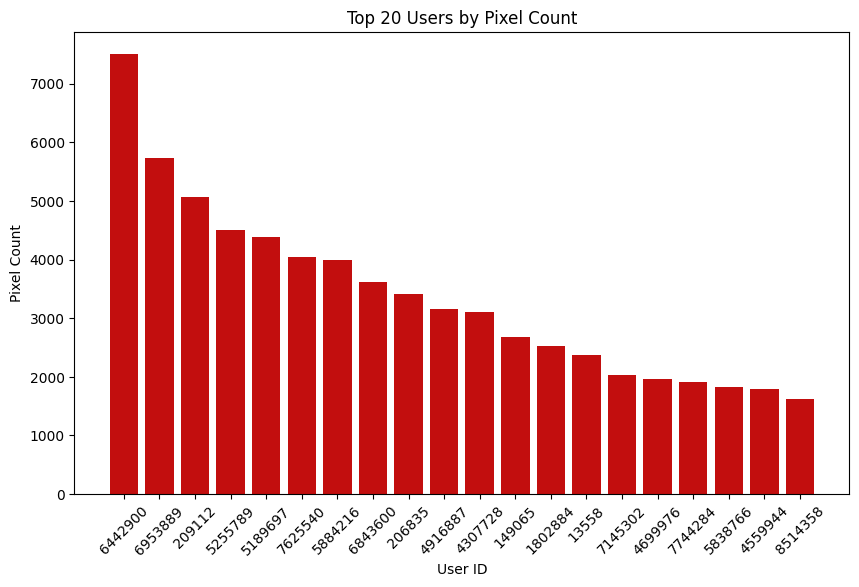

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_users['id'], top_users['tot_pixels'], color='#c20e0e')

# Add labels and title
plt.xlabel('User ID')
plt.ylabel('Pixel Count')
plt.title('Top 20 Users by Pixel Count')

# Set x-ticks to only include the IDs of the top users
plt.xticks(rotation=45)  # Rotate labels for better readability, if needed
plt.gca().set_xticklabels(top_users['id'])

# Save and show the plot
plt.savefig('pix.png', bbox_inches='tight')
plt.show()

In [ ]:
top_users = df.sort_values(by='unique_cord', ascending=False).head(20)

In [ ]:
top_users['id'] = top_users['id'].astype(str)

<ipython-input-43-4b8b67fe7015>:14: UserWarning: FixedFormatter should only be used together with FixedLocator


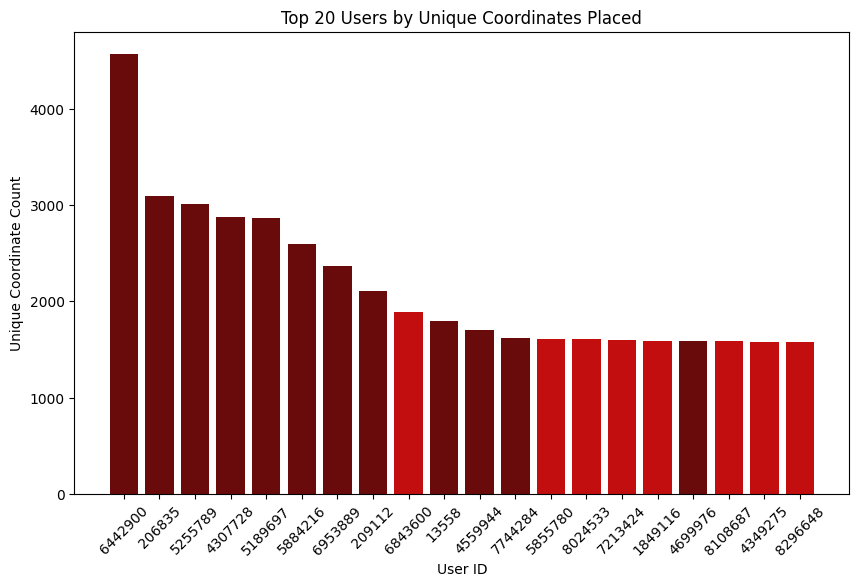

In [ ]:
plt.figure(figsize=(10, 6))

for user_id, unique_cord in zip(top_users['id'], top_users['unique_cord']):
    color = '#690b0b' if user_id in same else '#c20e0e'
    plt.bar(user_id, unique_cord, color=color)

# Add labels and title
plt.xlabel('User ID')
plt.ylabel('Unique Coordinate Count')
plt.title('Top 20 Users by Unique Coordinates Placed')

# Set x-ticks to only include the IDs of the top users
plt.xticks(rotation=45)  # Rotate labels for better readability, if needed
plt.gca().set_xticklabels(top_users['id'])

# Save and show the plot
plt.savefig('cord.png', bbox_inches='tight')
plt.show()

NameError: name 'unique_cord' is not defined

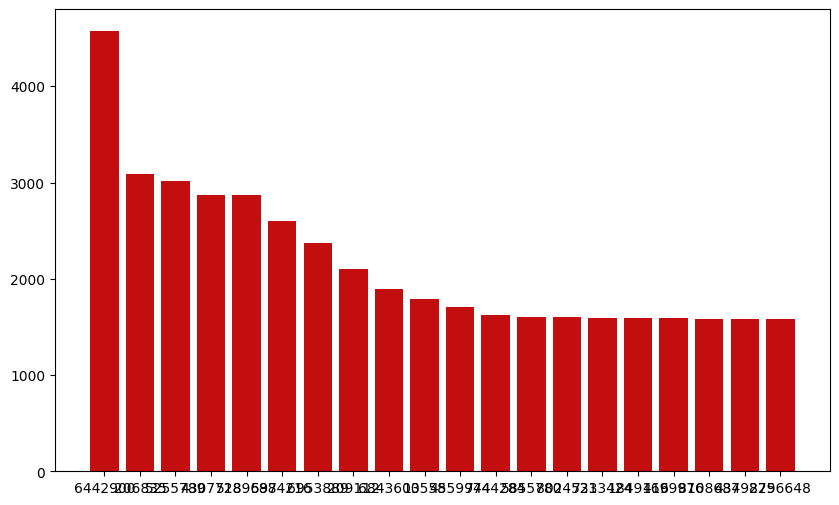

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_users['id'], top_users['unique_cord'], color='#c20e0e')

for user_id, tot_pixels in zip(top_users['id'], top_users['unique_cord']):
    if user_id in same:
        plt.bar(user_id, unique_cord, color='#690b0b')
    else:
        plt.bar(user_id, unique_cord, color='#c20e0e')

# Add labels and title
plt.xlabel('User ID')
plt.ylabel('Unique Coordinate Count')
plt.title('Top 20 Users by Unique Coordinates Placed')

# Set x-ticks to only include the IDs of the top users
plt.xticks(rotation=45)  # Rotate labels for better readability, if needed
plt.gca().set_xticklabels(top_users['id'])

# Save and show the plot
plt.savefig('cord.png', bbox_inches='tight')
plt.show()